In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd

In [10]:
res_df = pd.read_csv("DeLOB_benchmarking.csv", index_col=0)

rcParams['figure.figsize'] = (6, 4)
rcParams['figure.dpi'] = 300
plt.show()

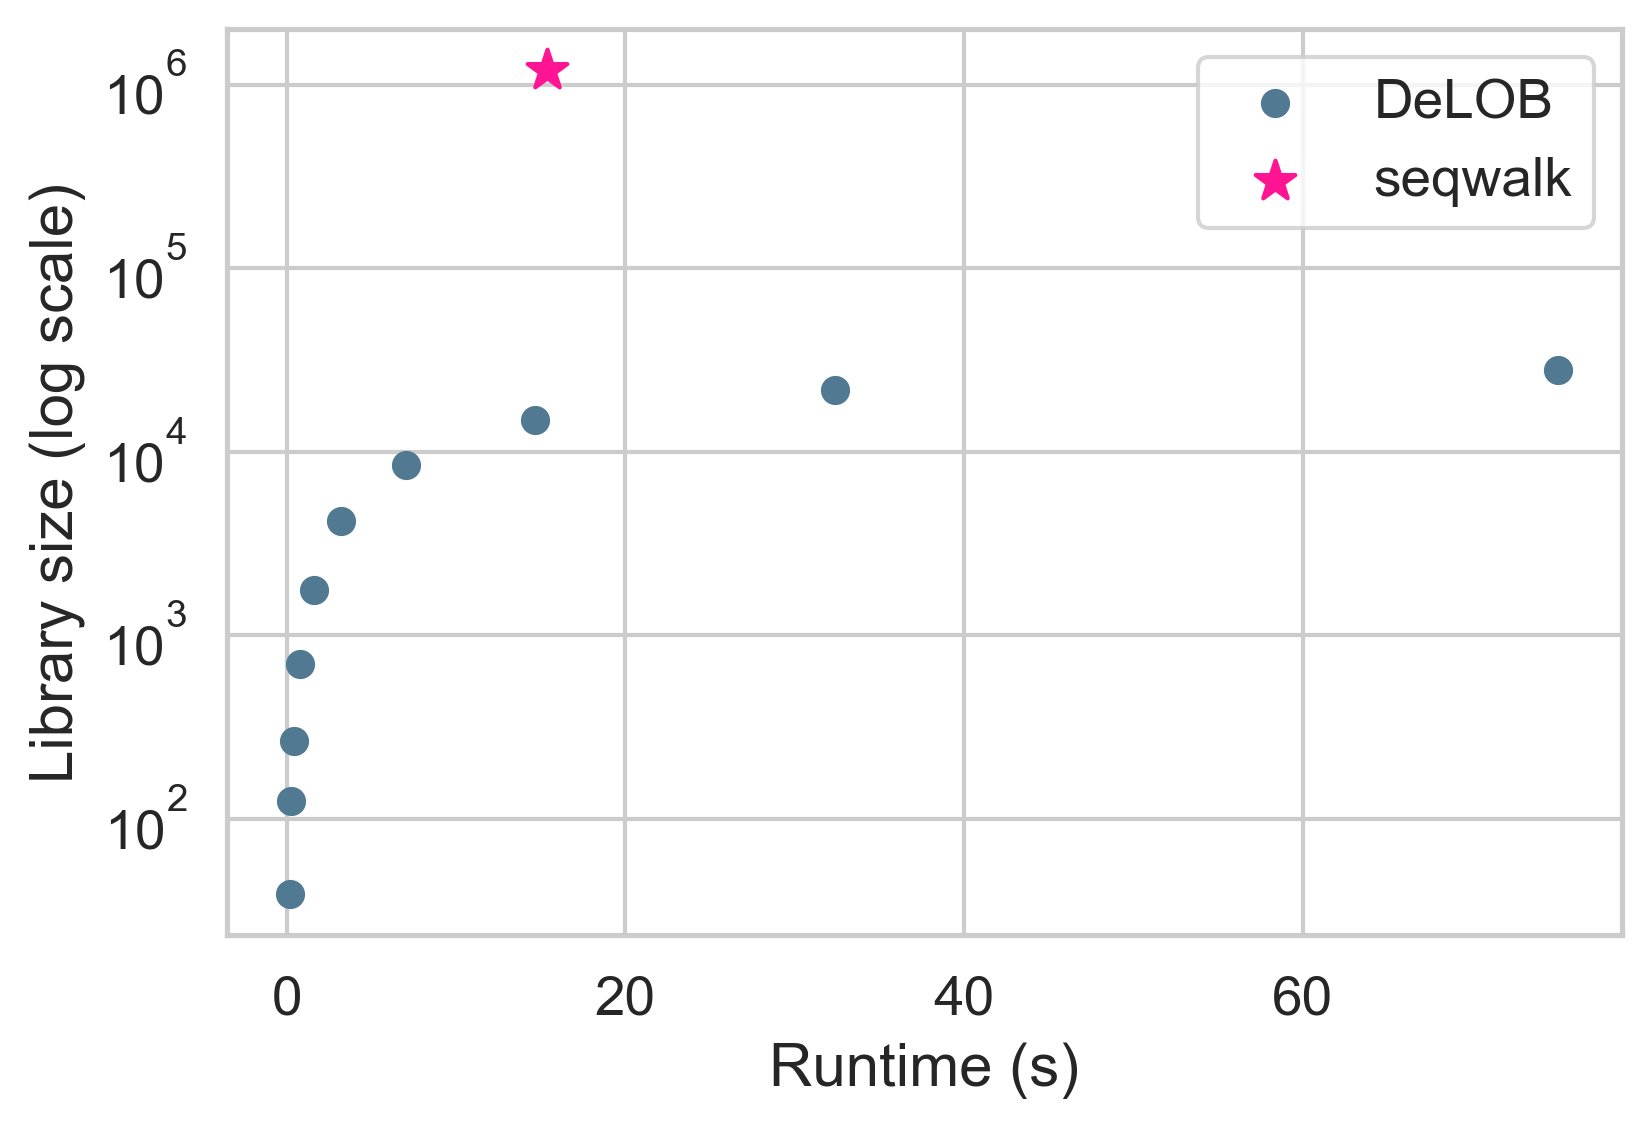

In [11]:
SW_size = 1198372
SW_time = 15.3595552444458


sns.set(style='whitegrid', font_scale=1.2)

sns.scatterplot(data=res_df,
             x="Total time",
             y="Library size")
plt.scatter(x=res_df["Total time"], y=res_df["Library size"], 
            color='#517a92', label='DeLOB')
plt.scatter(SW_time, SW_size, color="#ff1493", marker="*", s=100, label='seqwalk')
plt.yscale('log')
plt.ylabel('Library size (log scale)')
plt.xlabel('Runtime (s)')
plt.legend()
plt.show()

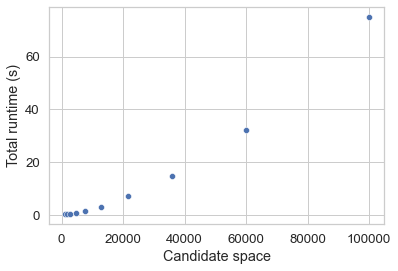

In [4]:
sns.scatterplot(data=res_df,
             x="Candidate space",
             y="Total time")
plt.xlabel('Candidate space')
plt.ylabel('Total runtime (s)')
plt.show()

Text(0, 0.5, 'BLAST runtime (s)')

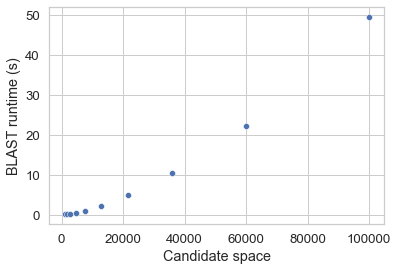

In [5]:
sns.scatterplot(data=res_df,
             x="Candidate space",
             y="BLAST time")
plt.xlabel('Candidate space')
plt.ylabel('BLAST runtime (s)')

Text(0, 0.5, 'Network elimination runtime (s)')

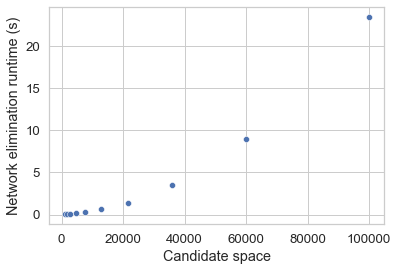

In [6]:
sns.scatterplot(data=res_df,
             x="Candidate space",
             y="Network elimination time")
plt.xlabel('Candidate space')
plt.ylabel('Network elimination runtime (s)')

Text(0, 0.5, 'Preprocessing time (s)')

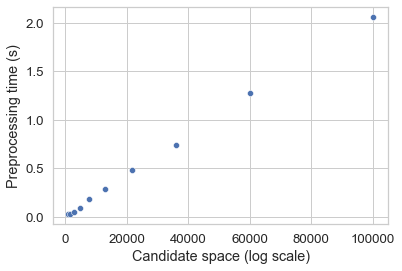

In [7]:
sns.scatterplot(data=res_df,
             x="Candidate space",
             y="Preprocessing time")
plt.xlabel('Candidate space (log scale)')
plt.ylabel('Preprocessing time (s)')